In [1]:
%tensorflow_version 1.x
!pip install opensimplex
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/stylegan2"

TensorFlow 1.x selected.
Mounted at /content/drive
/content/drive/My Drive/stylegan2


In [2]:
api_token = {"username":"samy280497","key":"f80239517ec84712358a021a2389ffc4"}
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json


import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d kmader/helen-eye-dataset

 98% 429M/438M [00:05<00:00, 89.5MB/s]
100% 438M/438M [00:05<00:00, 89.5MB/s]


In [ ]:
!unzip helen-eye-dataset.zip

In [2]:
!ls

eyedataset  eye_dataset  helen-eye-dataset.zip	stylegan2


In [6]:
!rm -r annotation/

In [7]:
!ls

helen-eye-dataset.zip  stylegan2  train_1  train_2  train_3  train_4


In [8]:
!mkdir eyedataset
!mv train_1/ eyedataset
!mv train_2/ eyedataset
!mv train_3/ eyedataset
!mv train_4/ eyedataset
%cd "eyedataset"

/content/drive/My Drive/stylegan2/eyedataset


In [9]:
!ls

train_1  train_2  train_3  train_4


In [17]:
!pwd

/content/drive/My Drive/stylegan2


In [11]:
%cd "/content/drive/My Drive/stylegan2"
!mkdir eye_dataset

/content/drive/My Drive/stylegan2


In [4]:
!cp -r /content/drive/My\ Drive/stylegan2/eyedataset/*/*/*.jpg /content/drive/My\ Drive/stylegan2/eye_dataset

In [5]:
%cd "/content/drive/My Drive/stylegan2/eye_dataset"
#!/usr/bin/python
from PIL import Image
import os, sys

path = "/content/drive/My Drive/stylegan2/eye_dataset/"
dirs = os.listdir(path)

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((512,512), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=90)

resize()

/content/drive/My Drive/stylegan2/eye_dataset


In [18]:

%tensorflow_version 1.x

!git clone https://github.com/dvschultz/stylegan2
!pip install opensimplex # needed for noise interpolation
%cd stylegan2
%mkdir datasets

fatal: destination path 'stylegan2' already exists and is not an empty directory.
/content/drive/My Drive/stylegan2/eyedataset/stylegan2


In [3]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
#2nd argument is where to put your tfrecords files
#3rd should point at your image dataset


/content/drive/My Drive/stylegan2/stylegan2


In [7]:
!python dataset_tool.py create_from_images /content/drive/My\ Drive/stylegan2/stylegan2/datasets/eye_dataset /content/drive/My\ Drive/stylegan2/eye_dataset

Loading images from "/content/drive/My Drive/stylegan2/eye_dataset"
Creating dataset "/content/drive/My Drive/stylegan2/stylegan2/datasets/eye_dataset"
Added 2000 images.


In [4]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/datasets/eye_dataset/"
!ls

/content/drive/My Drive/stylegan2/stylegan2/datasets/eye_dataset
eye_dataset-r02.tfrecords  eye_dataset-r05.tfrecords  eye_dataset-r08.tfrecords
eye_dataset-r03.tfrecords  eye_dataset-r06.tfrecords  eye_dataset-r09.tfrecords
eye_dataset-r04.tfrecords  eye_dataset-r07.tfrecords


In [5]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
!python run_training.py --num-gpus=1 --data-dir=./datasets --config=config-b --dataset=eye_dataset --mirror-augment=true --metrics=fid50k

/content/drive/My Drive/stylegan2/stylegan2
Local submit - run_dir: results/00000-stylegan2-eye_dataset-1gpu-config-b
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
tcmalloc: large alloc 4294967296 bytes == 0x79ce000 @  0x7f7674f74001 0x7f7671a1a4ff 0x7f7671a6ab08 0x7f7671a6eac7 0x7f7671b0d1a3 0x50a4a5 0x50cc96 0x507be4 0x508ec2 0x594a01 0x549e8f 0x5515c1 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x5095c8 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x588e5c 0x59fd0e
tcmalloc: large alloc 4294967296 bytes == 0x7f74ab2c8000 @  0x7f7674f721e7 0x7f7671a1a41e 0x7f7671a6ac2b 0x7f7671a6b30f 0x7f7671b0d0a3 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4
tcmalloc: large alloc

In [6]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/results"
!ls

/content/drive/My Drive/stylegan2/stylegan2/results
00000-stylegan2-eye_dataset-1gpu-config-b


In [7]:

%cd "/content/drive/My Drive/stylegan2/stylegan2/results/00000-stylegan2-eye_dataset-1gpu-config-b"
!ls

/content/drive/My Drive/stylegan2/stylegan2/results/00000-stylegan2-eye_dataset-1gpu-config-b
fakes000001.png  log.txt		      reals.png  submit_config.pkl
fakes_init.png	 network-snapshot-000001.pkl  run.txt	 submit_config.txt


In [9]:
%cd "/content/drive/My Drive/stylegan2/stylegan2"
!python run_metrics.py --data-dir=./datasets --network=./results/00000-stylegan2-eye_dataset-1gpu-config-b/network-snapshot-000001.pkl --metrics=fid50k,ppl_wend --dataset=eye_dataset --mirror-augment=true

/content/drive/My Drive/stylegan2/stylegan2
Local submit - run_dir: results/00001-run-metrics
dnnlib: Running run_metrics.run() on localhost...
Evaluating metrics "fid50k,ppl_wend" for "./results/00000-stylegan2-eye_dataset-1gpu-config-b/network-snapshot-000001.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
tcmalloc: large alloc 4294967296 bytes == 0x5525e000 @  0x7ffa90c3f001 0x7ffa8d6e54ff 0x7ffa8d735b08 0x7ffa8d739ac7 0x7ffa8d7d81a3 0x50a4a5 0x50cc96 0x507be4 0x508ec2 0x594a01 0x549e8f 0x5515c1 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x5095c8 0x50a2fd 0x50beb4 0x58e6f9 0x4b5d7f 0x50c127 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x508ec2 0x594a01
tcmalloc: large alloc 4294967296 bytes == 0x7ff892000000 @  0x7ffa90c3d1e7 0x7ffa8d6e541e 0x7ffa8d735c2b 0x7ffa8d73630f 0x7ffa8d7d80a3 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x5

In [10]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
!pip install opensimplex
!python run_generator.py generate-images --network=./results/00000-stylegan2-eye_dataset-1gpu-config-b/network-snapshot-000001.pkl --seeds=6600-6635 --truncation-psi=0.5

/content/drive/My Drive/stylegan2/stylegan2
Local submit - run_dir: results/00002-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "./results/00000-stylegan2-eye_dataset-1gpu-config-b/network-snapshot-000001.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating image for seed 6600 (0/36) ...
Generating image for seed 6601 (1/36) ...
Generating image for seed 6602 (2/36) ...
Generating image for seed 6603 (3/36) ...
Generating image for seed 6604 (4/36) ...
Generating image for seed 6605 (5/36) ...
Generating image for seed 6606 (6/36) ...
Generating image for seed 6607 (7/36) ...
Generating image for seed 6608 (8/36) ...
Generating image for seed 6609 (9/36) ...
Generating image for seed 6610 (10/36) ...
Generating image for seed 6611 (11/36) ...
Generating image for seed 6612 (12/36) ...
Generating image f

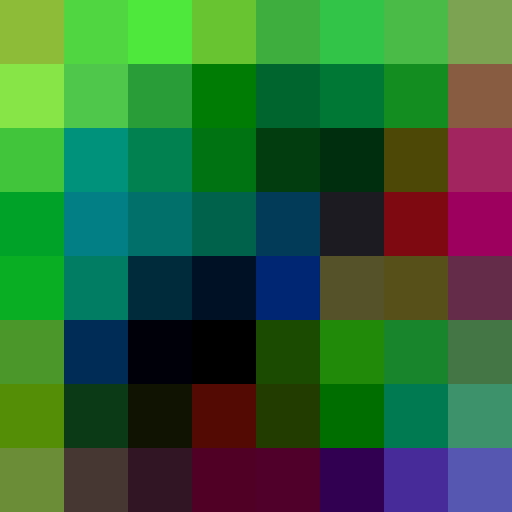

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6600.png


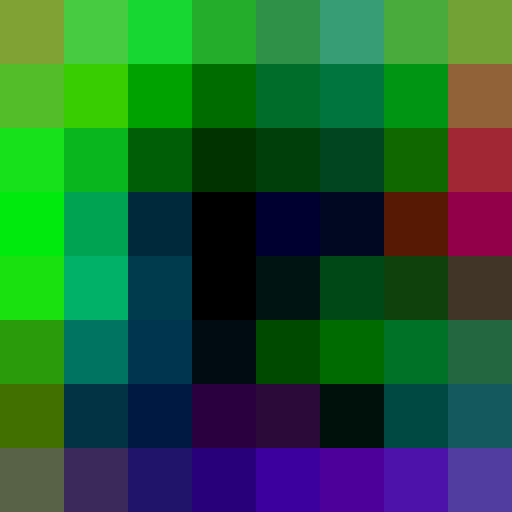

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6601.png


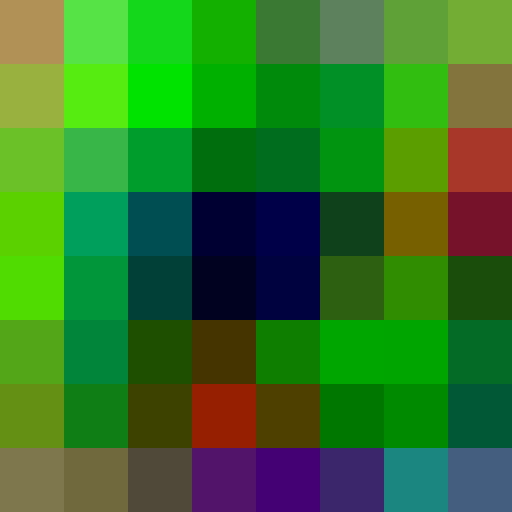

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6602.png


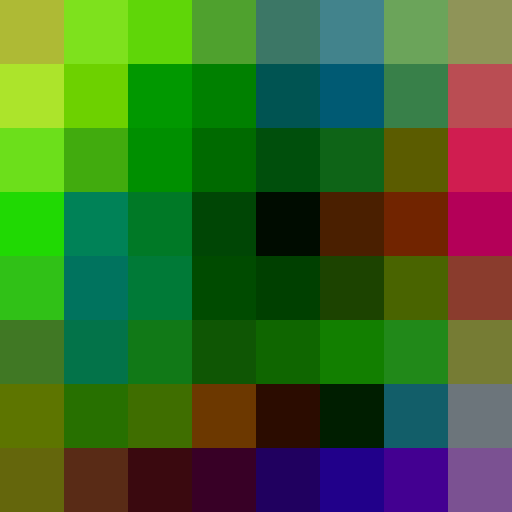

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6603.png


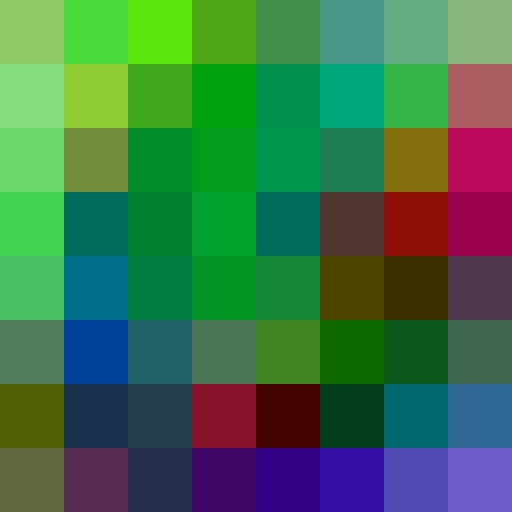

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6604.png


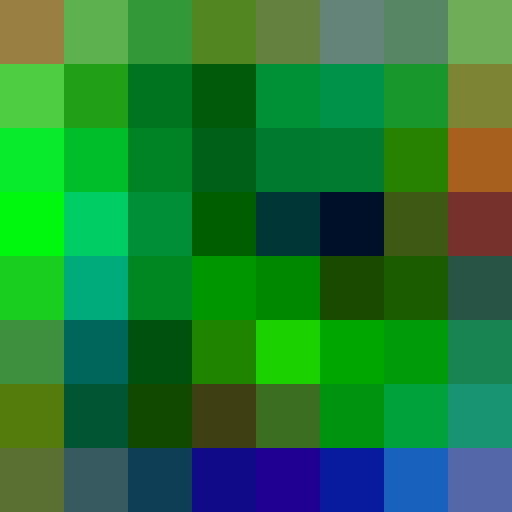

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6605.png


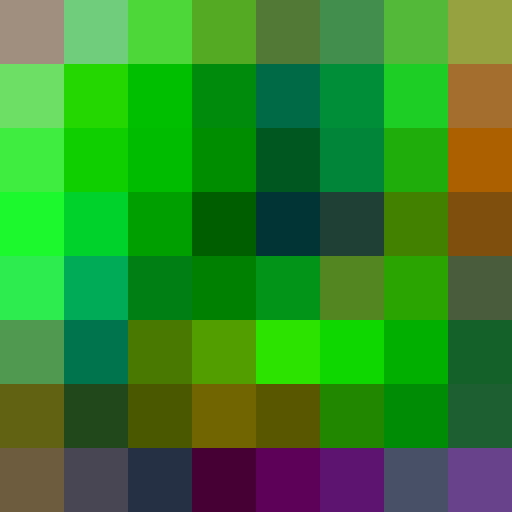

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6606.png


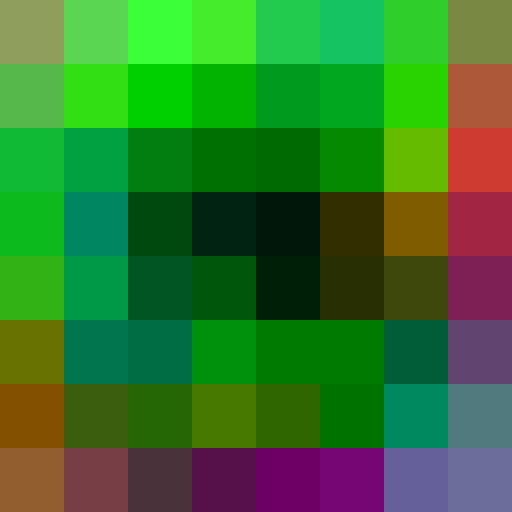

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6607.png


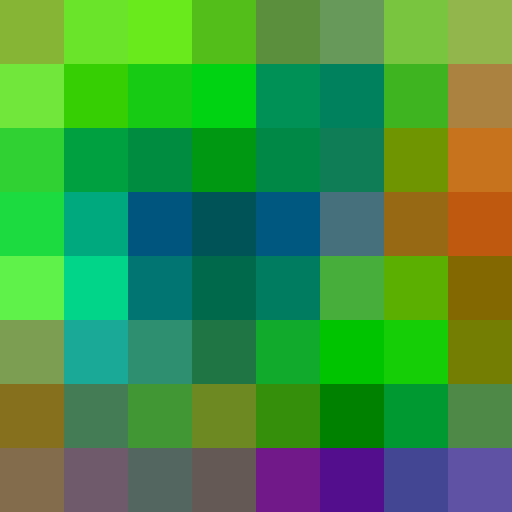

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6608.png


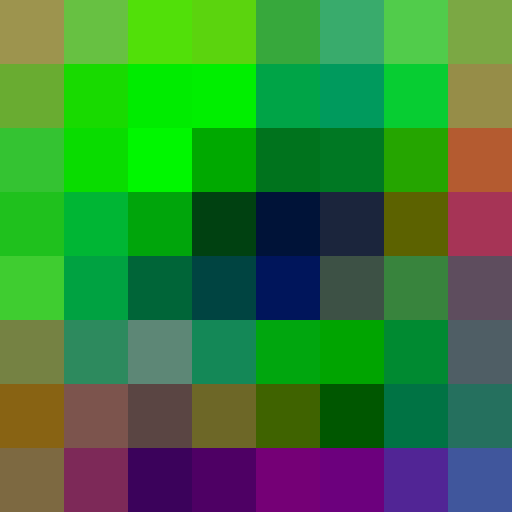

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6609.png


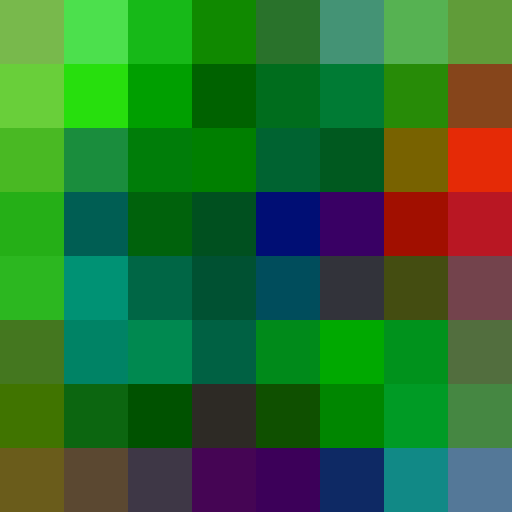

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6610.png


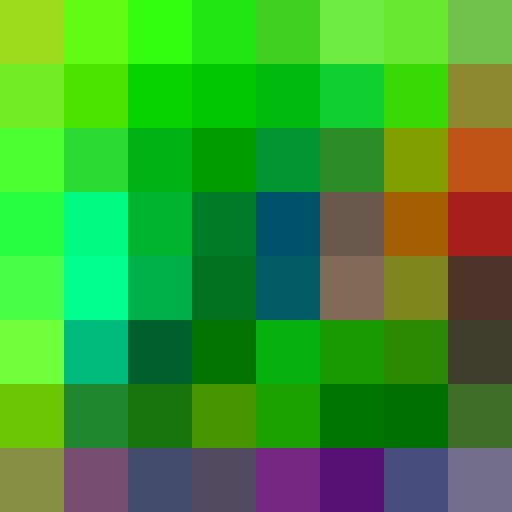

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6611.png


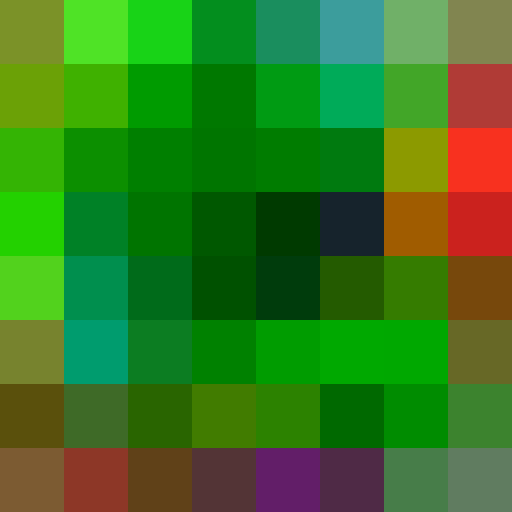

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6612.png


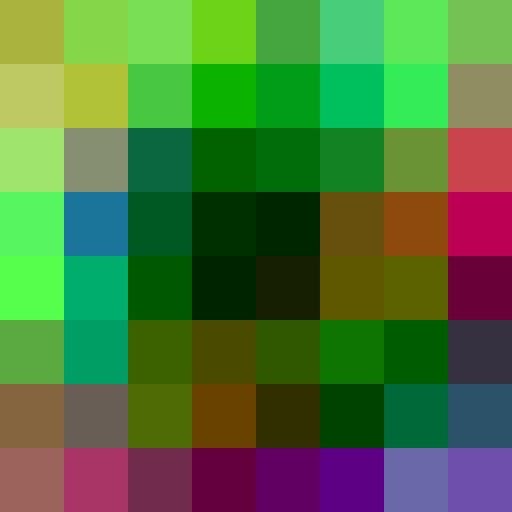

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6613.png


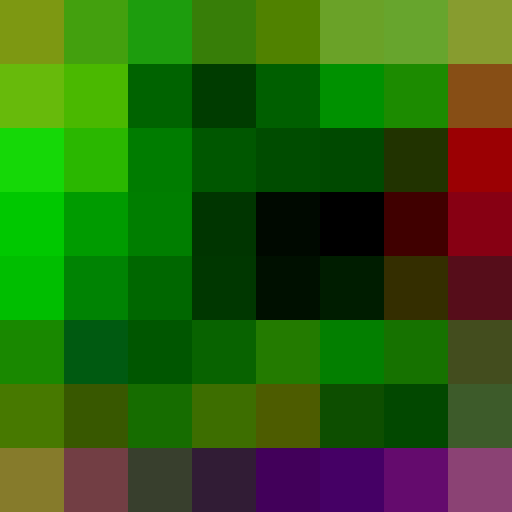

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6614.png


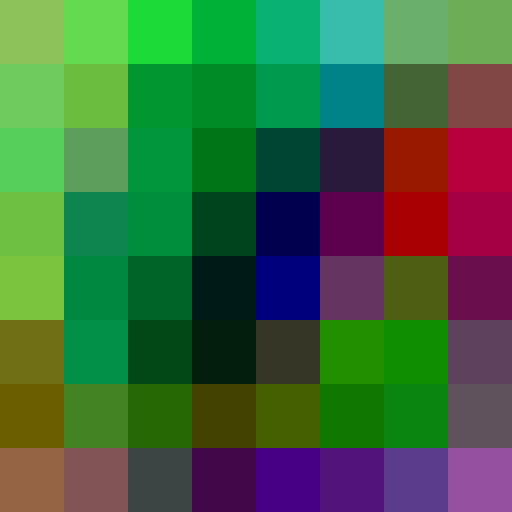

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6615.png


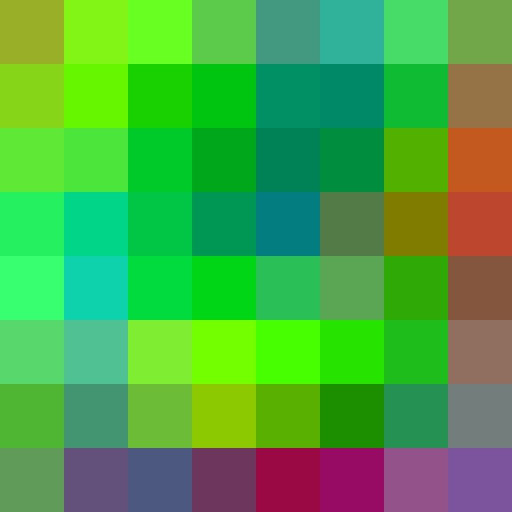

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6616.png


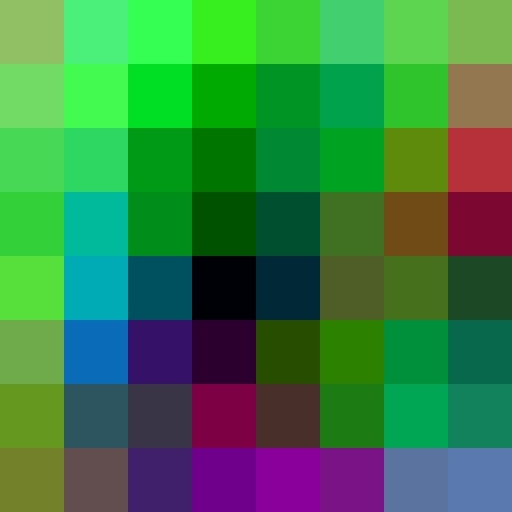

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6617.png


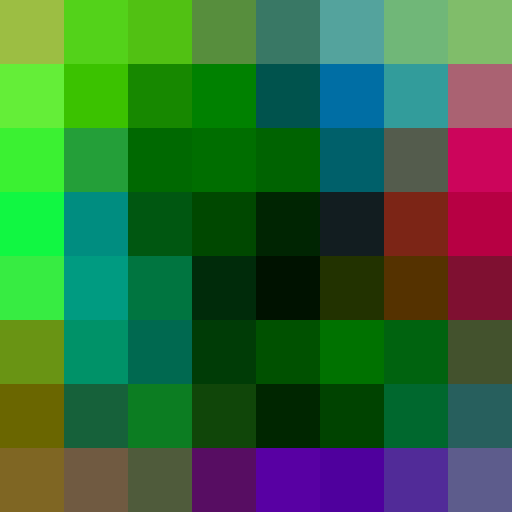

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6618.png


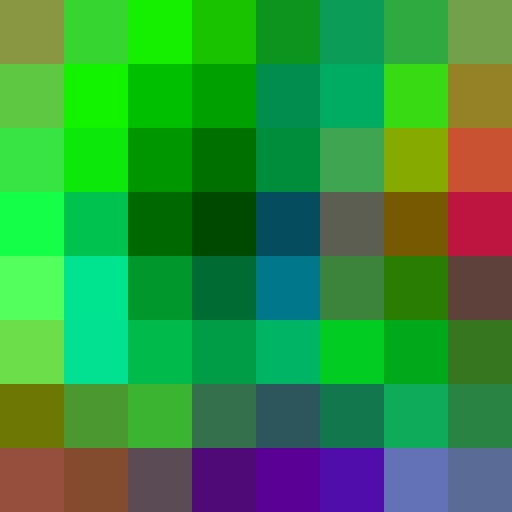

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6619.png


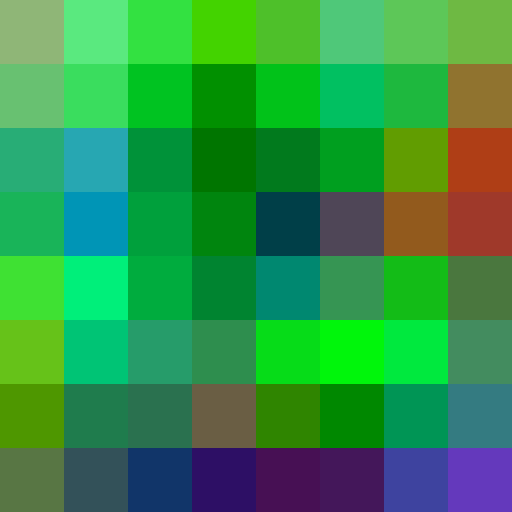

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6620.png


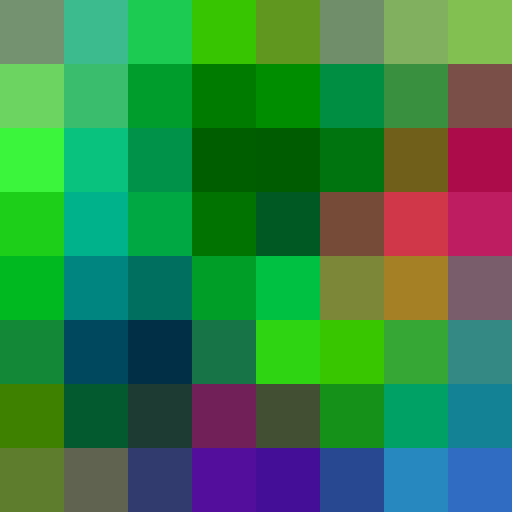

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6621.png


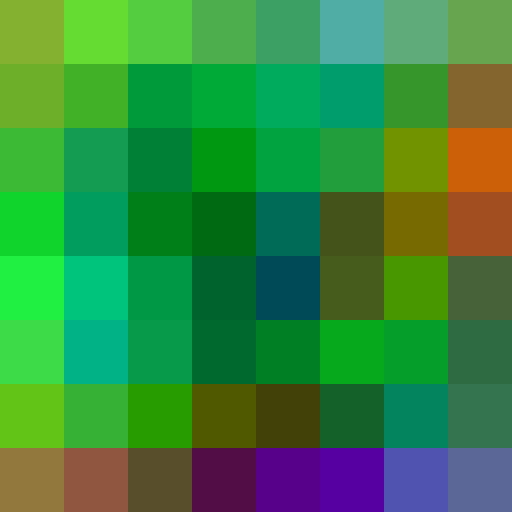

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6622.png


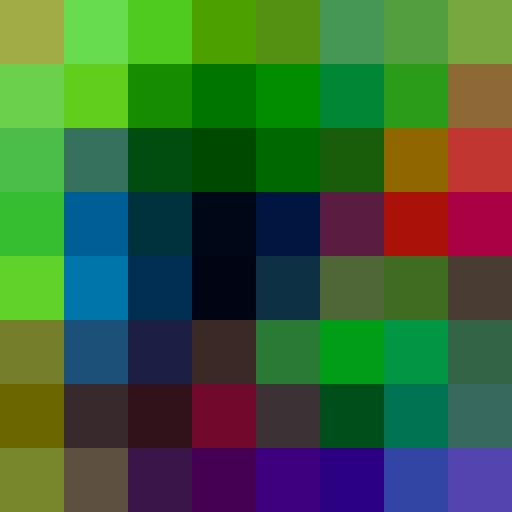

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6623.png


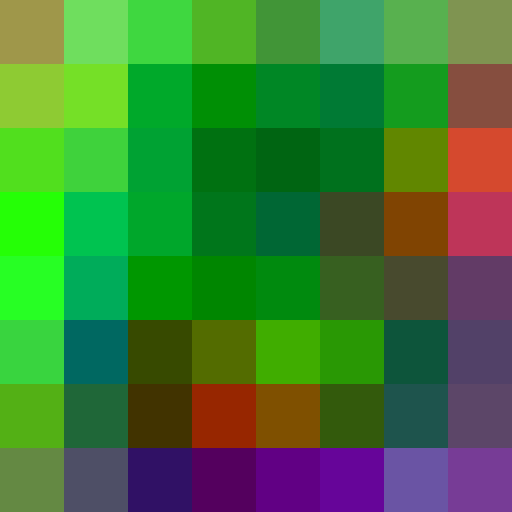

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6624.png


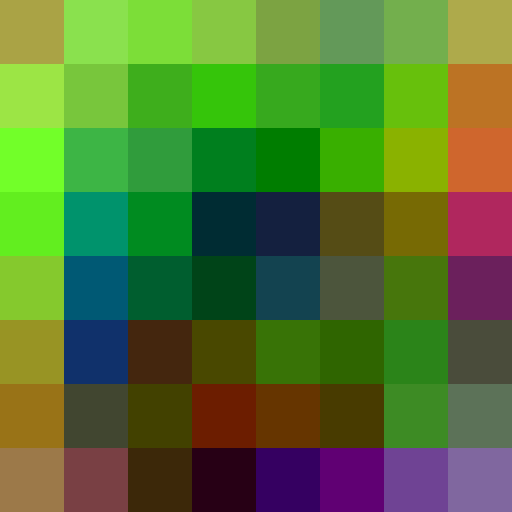

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6625.png


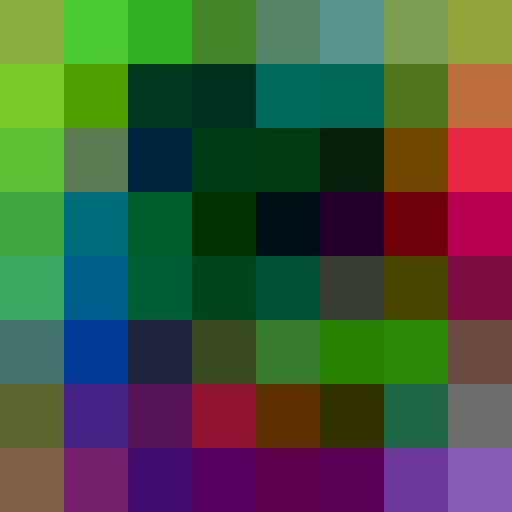

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6626.png


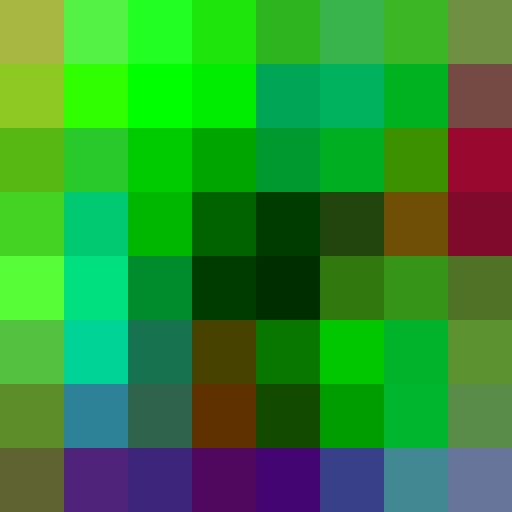

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6627.png


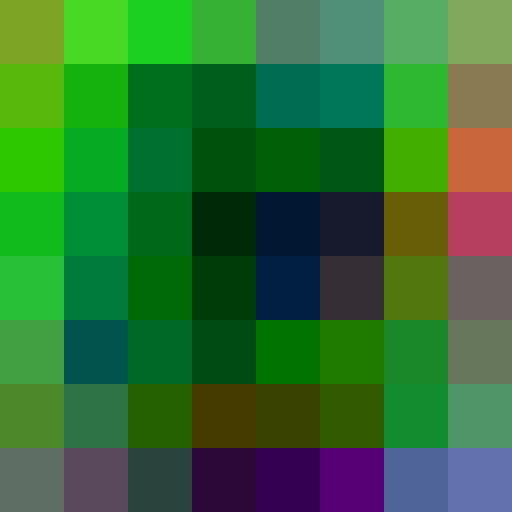

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6628.png


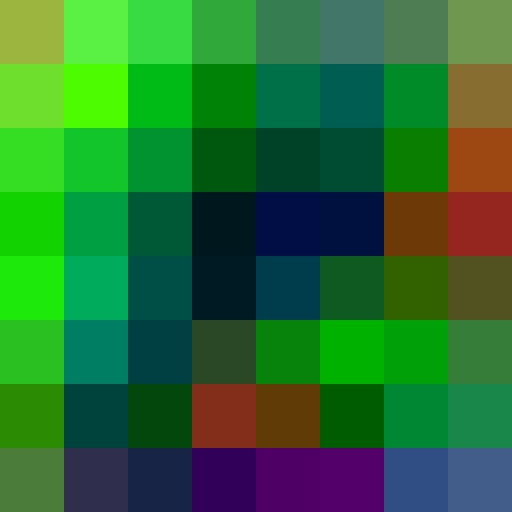

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6629.png


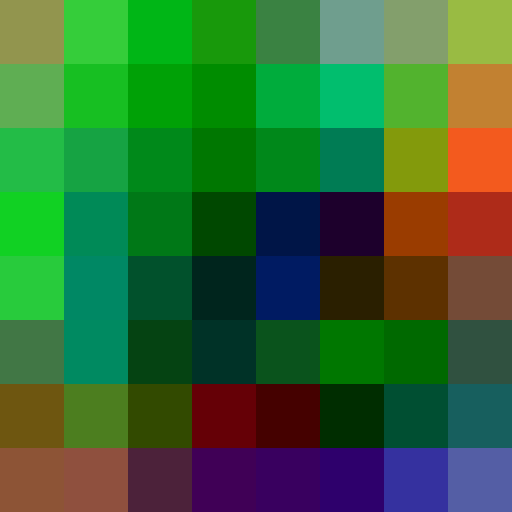

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6630.png


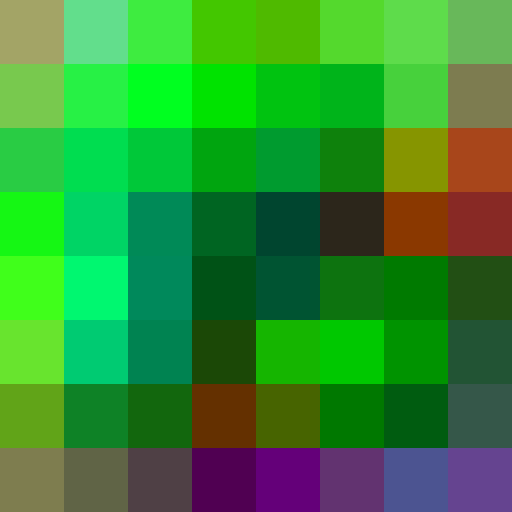

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6631.png


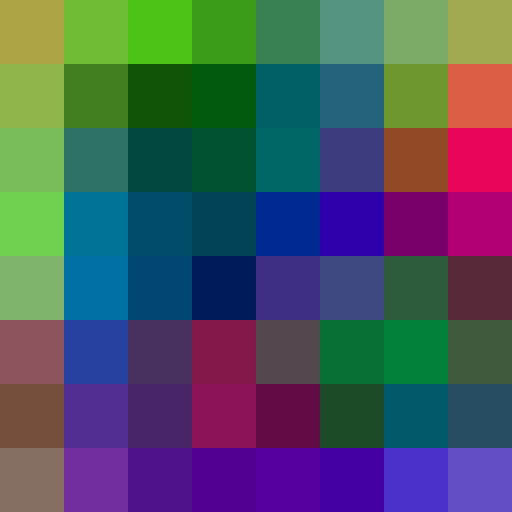

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6632.png


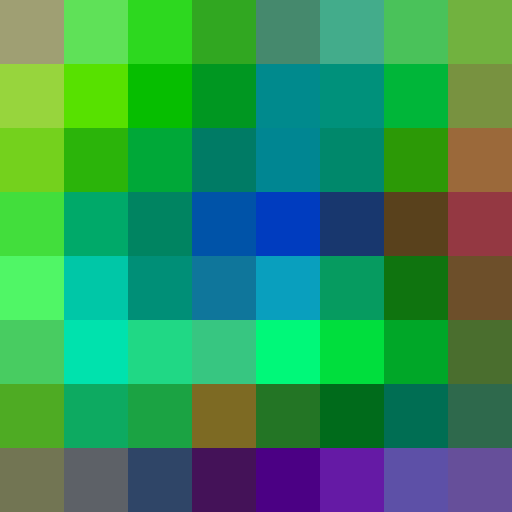

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6633.png


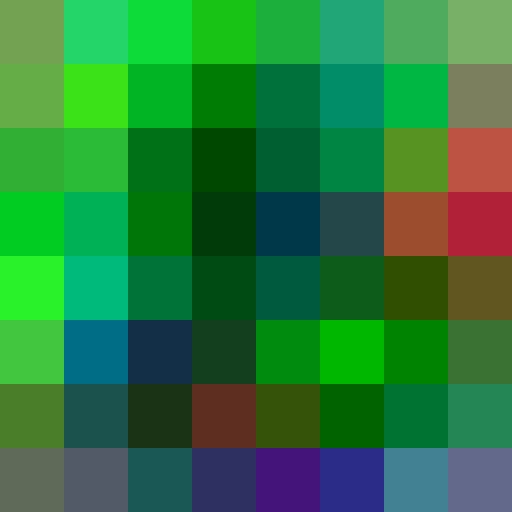

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6634.png


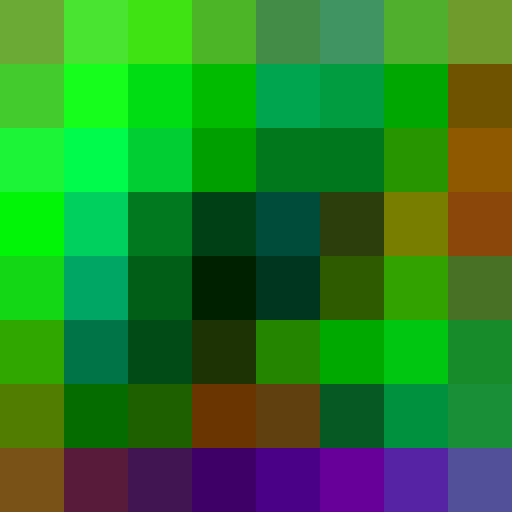

/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/seed6635.png


In [11]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/drive/My Drive/stylegan2/stylegan2/results/00002-generate-images/*.png'): 
    display(Image(filename=imageName))
    print(imageName)